In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Probability distributions

One of the prime reasons for using probability distributions is to model the distribution of a random variable when having finite data. this is called *density estimation*. The chapter focusses on 3 parametric methods and ends with aa short discussion of 3 non-parametric methods

## Binary variable

When there are two outcomes where the probability of occuring is $\mu$ (and thus not occuring is $(1 - \mu)$ can be modelled using a bernoulli distribution

$$
    Bern(x|\mu) = \mu^x (1 - \mu)^{1 - x}
$$

And the mean an variance are given by

$$
    E[x] = 0 * (1 - \mu) + 1 * (\mu) = \mu \\
    Var[x] = E[x^2] - E[x]^2 = (0^ * (1 - \mu) + 1^ * (\mu)) + \mu^2 = \mu + \mu^2 = \mu * (1 - \mu)
$$

The entropy calculates a measurement of disparity and is given by 

$$
    H[x] = -\sum_{i=1}^{N} p(x_i) \; log(p(x_i)
$$

For the bernoulli distribution this is 

$$
    H[x] = - \mu \; log(\mu) - (1 - \mu) \; log(1 - \mu)
$$

In [6]:
entropy_bernoulli = lambda mu : -(mu * np.log(mu)) - (1 - mu) * np.log(1 - mu)

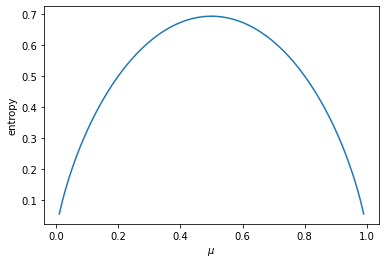

In [23]:
mus = np.linspace(0.01, 0.99, 100)
plt.plot(mus, list(map(entropy_bernoulli, mus)))
plt.xlabel(r'$\mu$')
plt.ylabel('entropy')
plt.show()

This indeed shows that when the probability of occuring is 50% the entropy is highest. An example random variable with the bernoulli distribution is given as follows

In [24]:
from scipy import stats

In [36]:
bernoulli = stats.bernoulli(0.25) # So we zet the parameter mean to 0.25

sample = bernoulli.rvs(100)

In the frequentist paradigm you can estimate this parameter $\mu$ by taking the maximmum of the negative log likelihood of the data 

$$
    p(D|\mu) = \prod_{i=0}^{N}p(x_i|\mu) \\
    \sum_{n=1}^N x_n ln \mu + (1 - x_n) ln (1 - \mu) \\
    \text{Set the derivative wrt mu and set to zero} \\
    \sum_{n=1}^N \frac{x}{\mu} - \frac{(1 - x)}{(1 - \mu)} = 0 \\
    \mu_{ML} = \frac{1}{N} \sum_{n=1}^N x_n
$$

So the maximum likelihood of the probability of an effect occuring is the number of times it occured divided by the number of occurences

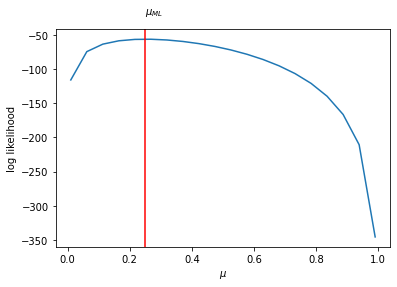

In [115]:
loglikelihood = lambda x, mu: (x * np.log(mu)) + ((1 - x) * np.log(1 - mu))

loglikelihoods = []

for mu in np.linspace(0.01, 0.99, 20):
    loglikelihoods.append(np.sum(list(map(loglikelihood, sample, np.ones(sample.size) * mu))))

u_ml = (1 / sample.size) * sample.sum()

plt.plot(np.linspace(0.01, 0.99, 20), loglikelihoods)
plt.axvline(u_ml, c='r')
plt.text(u_ml, -20, s=r'$\mu_{ML}$')
plt.xlabel(r'$\mu$')
plt.ylabel('log likelihood')
plt.show()